In [1]:
import numpy as np 
import pandas as pd 
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

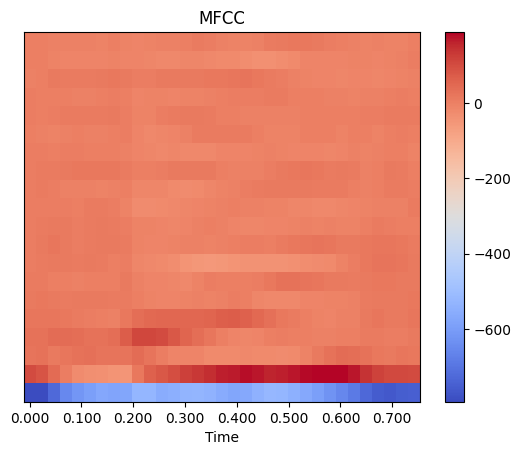

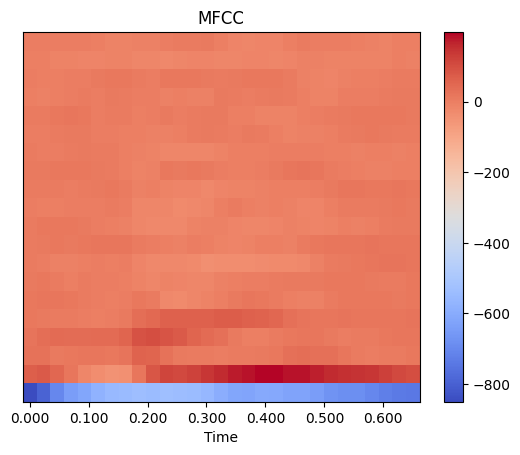

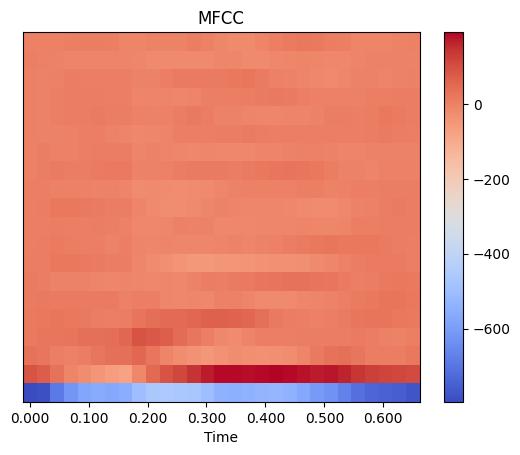

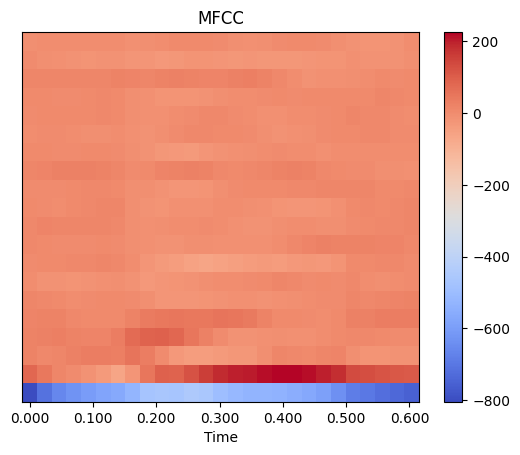

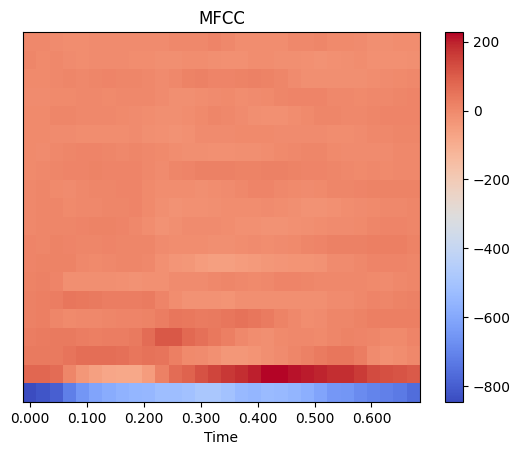

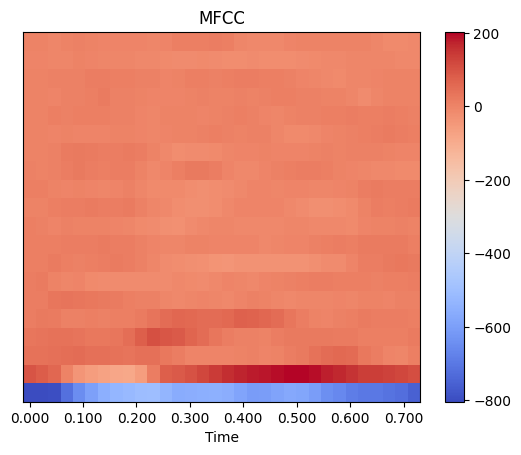

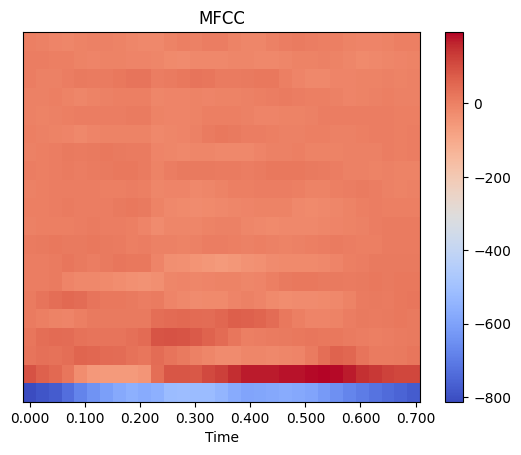

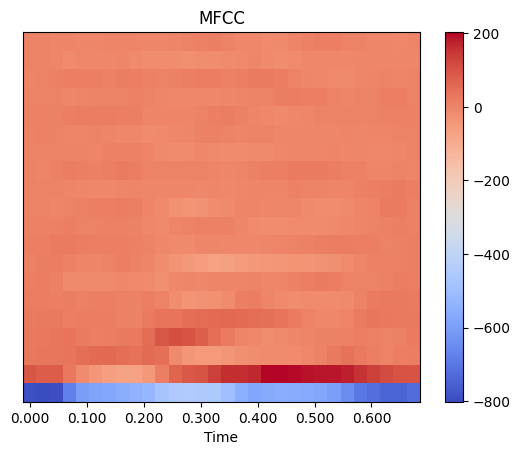

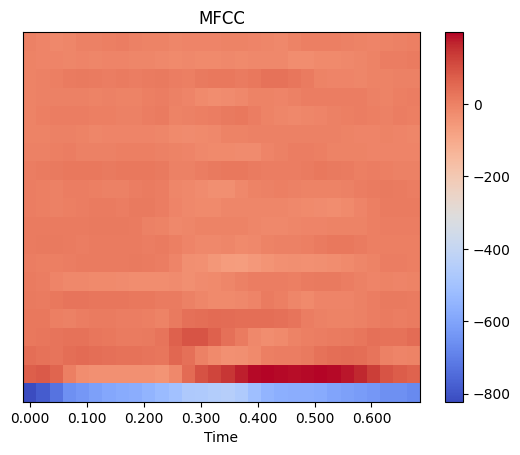

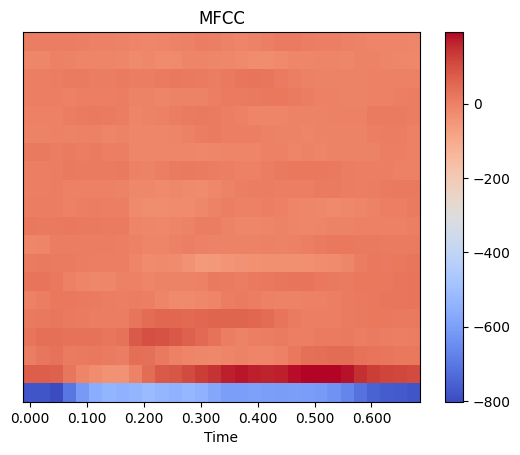

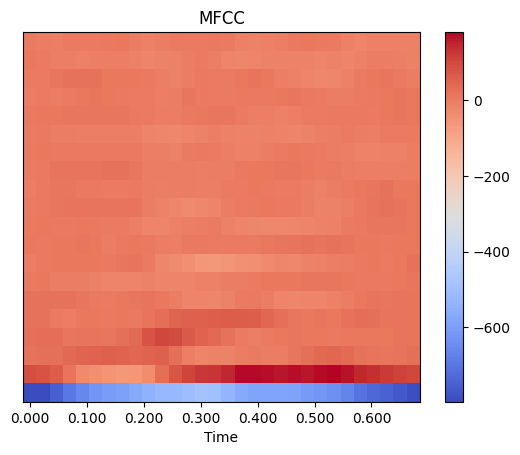

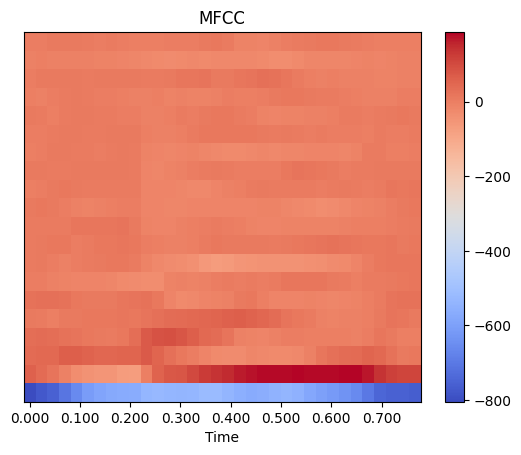

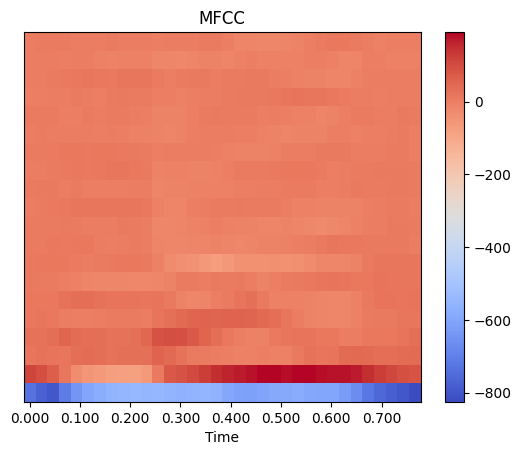

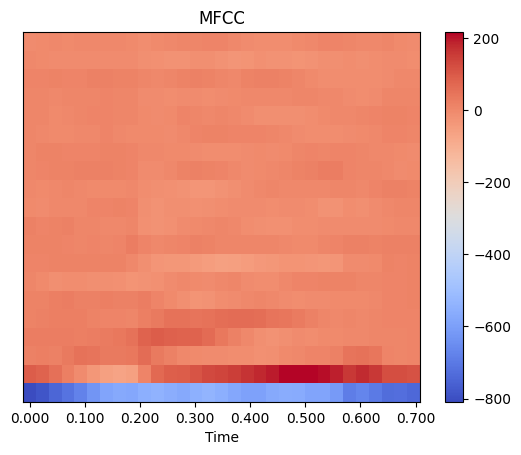

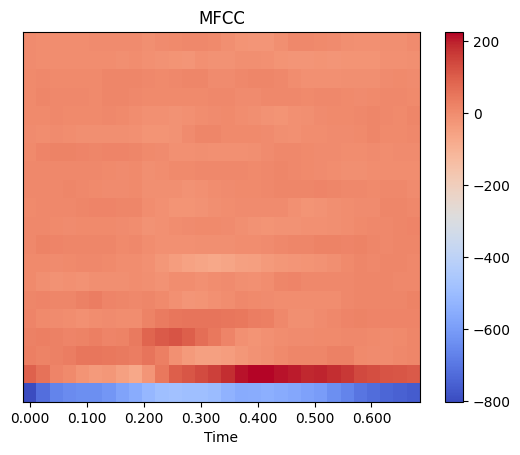

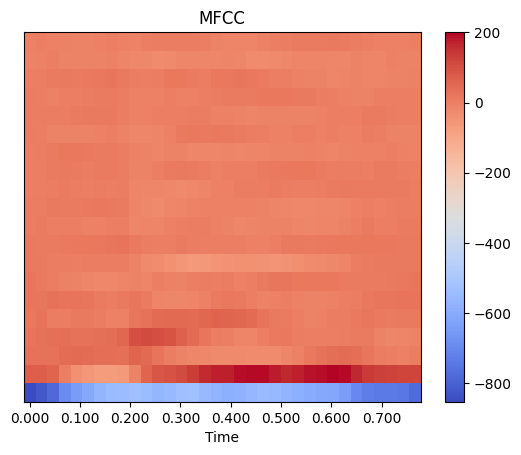

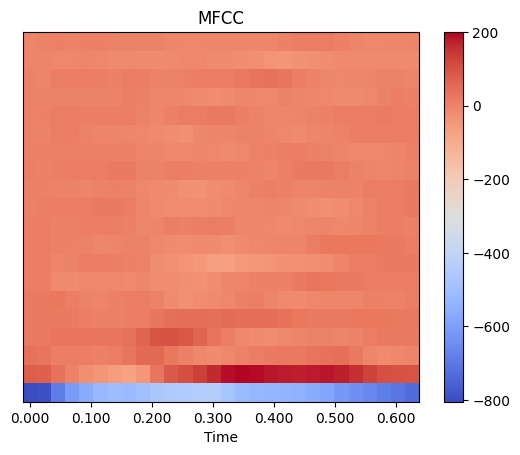

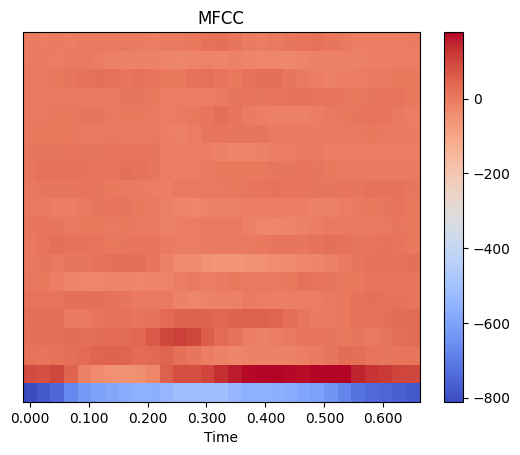

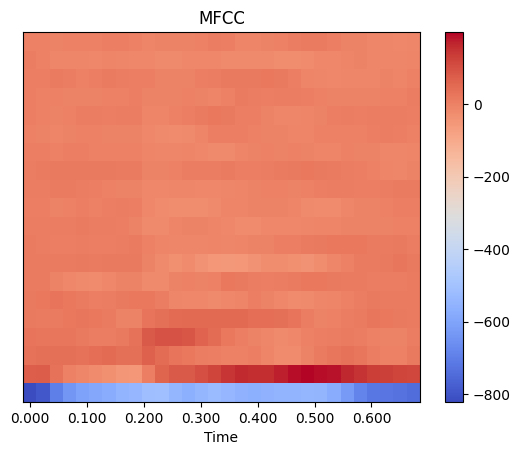

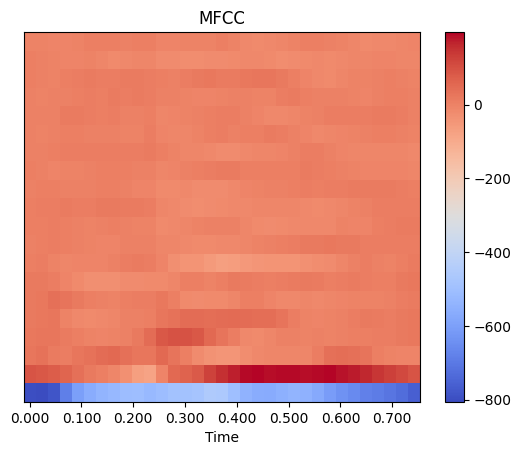

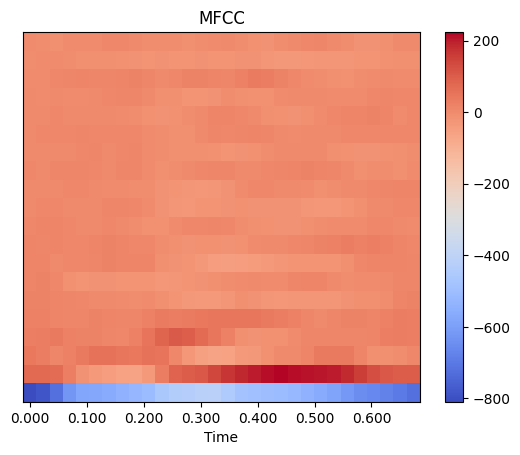

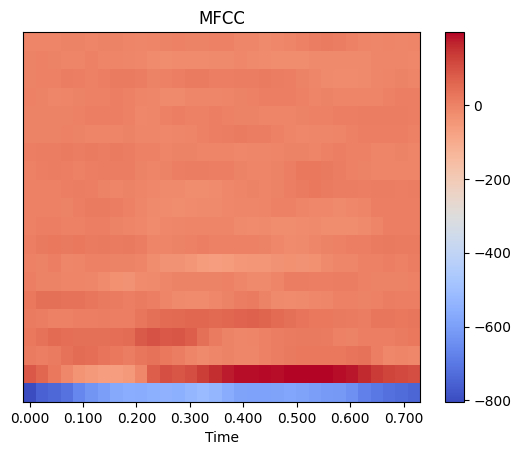

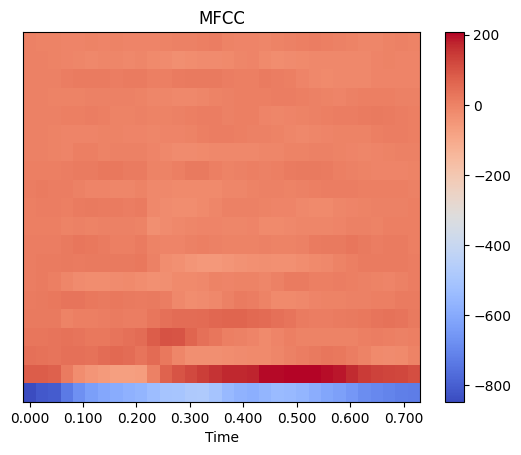

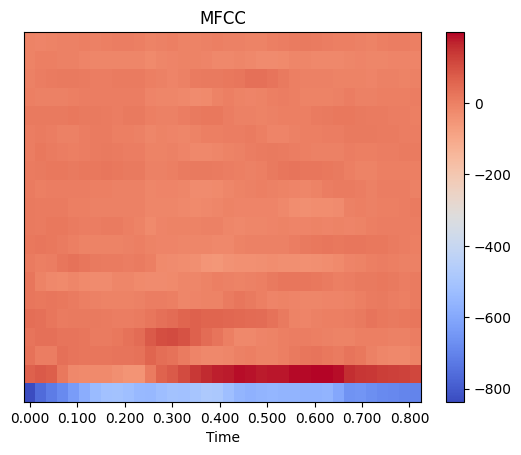

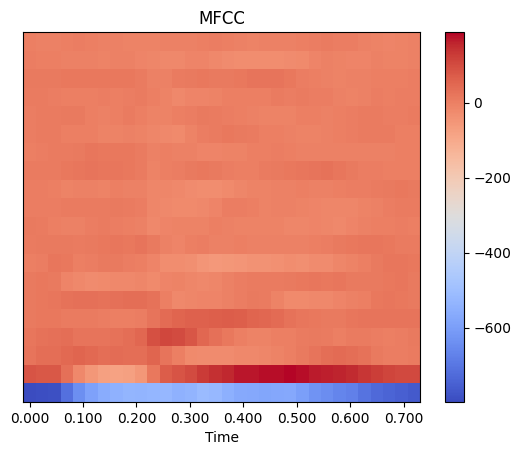

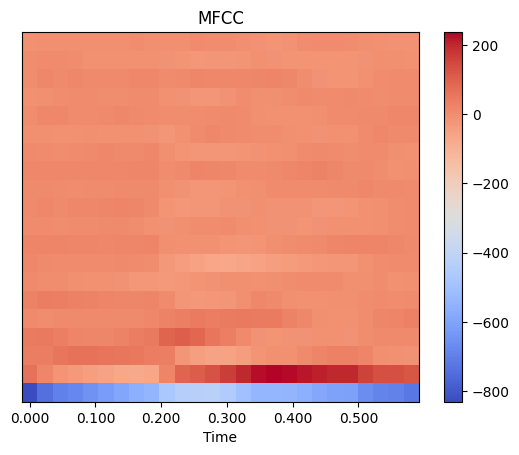

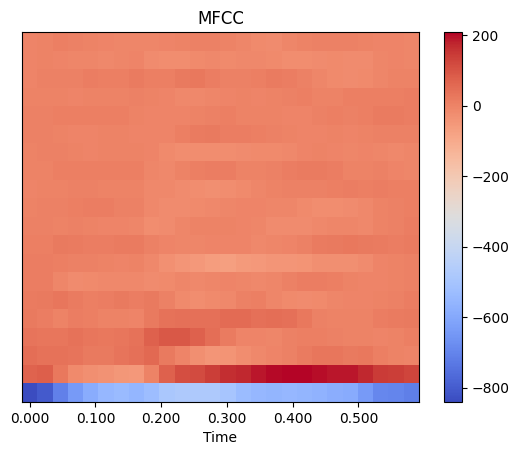

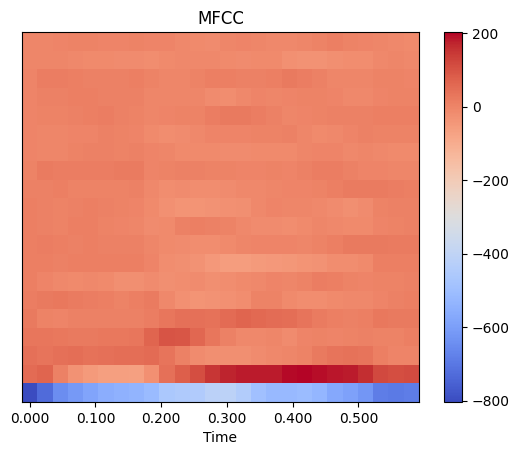

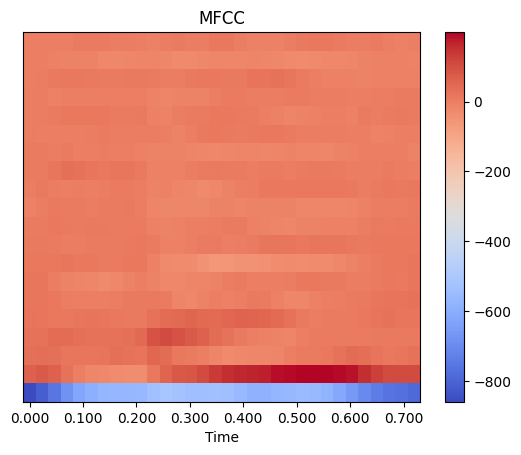

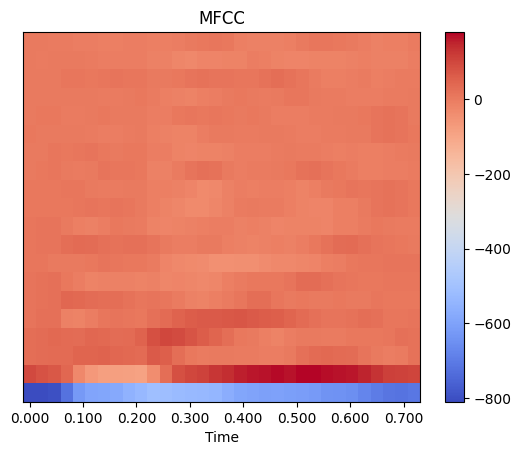

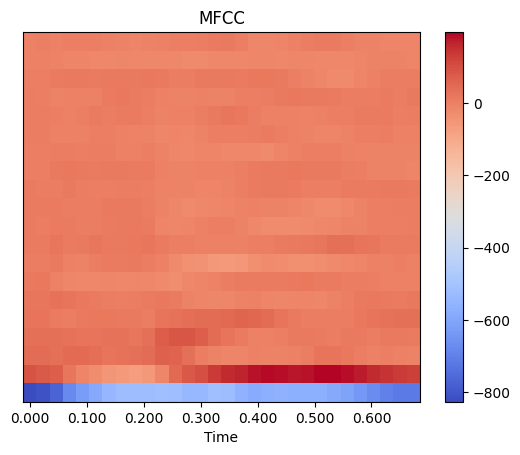

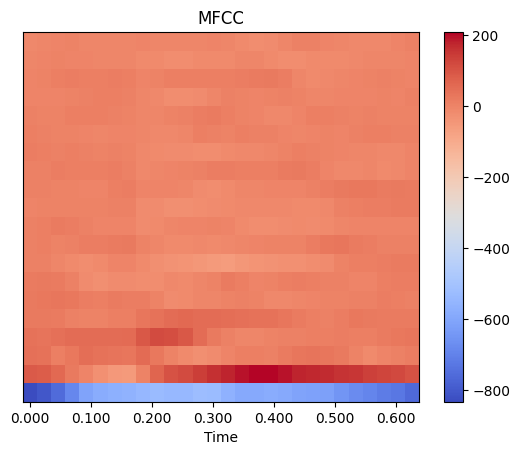

KeyboardInterrupt: 

In [26]:
au = 'C:\\Users\\Admin\\Downloads\\МН\\data\\01'
features = []
# Перебір усіх аудіофайлів у поточній папці
for filename in os.listdir(au):
            # Завантаження аудіофайлу
            audio_path = os.path.join(au, filename)
            y, sr = librosa.load(audio_path)
            
            mfccs = librosa.feature.mfcc(y=y, sr=sr)
            # Усереднення MFCC
            mfccs_mean = np.mean(mfccs, axis=1)
            digit=int(filename[0])
            features1 = np.append(mfccs_mean, digit)
            features.append(features1)

            fig, ax = plt.subplots()
            img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
            fig.colorbar(img, ax=ax)
            ax.set(title='MFCC')
            plt.show()





In [2]:
# Шлях до папки з аудіофайлами
audio_parent_folder = 'C:\\Users\\Admin\\Downloads\\МН\\data'
data=[]

# Перебір усіх папок з аудіофайлами
for foldername in os.listdir(audio_parent_folder):
    # Шлях до поточної папки
    current_folder = os.path.join(audio_parent_folder, foldername)
    
    # Перевірка, чи поточний шлях є папкою
    if os.path.isdir(current_folder):
        # Перебір усіх аудіофайлів у поточній папці
        for filename in os.listdir(current_folder):
            # Завантаження аудіофайлу
            audio_path = os.path.join(current_folder, filename)
            y, sr = librosa.load(audio_path)
            
            mfccs = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=20)
            # Усереднення MFCC
            mfccs_mean = np.mean(mfccs, axis=1)
            digit=int(filename[0])
            features = np.append(mfccs_mean, digit)
            data.append(features)
            

In [3]:
cols = ['mean_' + str(x+1) for x in range(20)] + ['Digit']
df = pd.DataFrame(data, columns=cols)


In [104]:
df.head(20)

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,...,mean_12,mean_13,mean_14,mean_15,mean_16,mean_17,mean_18,mean_19,mean_20,Digit
0,-617.908264,101.589767,9.847578,26.403582,25.784246,1.755381,7.380787,-12.520157,8.840893,-0.251336,...,0.546056,9.145018,-5.219188,-0.006961,5.060726,0.505754,5.315994,-12.108281,1.253738,0
1,-636.503845,104.663483,18.785162,32.966640,32.188751,5.560348,2.799065,-8.271547,8.137912,-4.781162,...,2.431508,6.476462,-2.465933,3.535455,6.504354,2.580142,5.059443,-10.814376,-1.998761,0
2,-600.729553,100.824333,3.306875,20.441509,27.031813,2.805102,7.517792,-12.253216,4.049151,-2.950716,...,-3.485104,8.599191,-3.172623,2.482401,3.427607,2.728650,1.966710,-9.709393,0.152205,0
3,-591.326294,110.810890,2.862722,20.751930,25.868662,-0.488132,-4.731595,-16.296522,4.120318,2.255771,...,2.802091,13.692049,-5.263564,0.025805,2.409827,0.901551,11.824884,-17.235985,-3.059992,0
4,-619.836182,97.751701,19.811028,26.886065,20.381252,5.995905,-1.315153,-11.737551,5.809255,-2.680438,...,3.717846,9.680632,-1.695362,-4.911314,0.264511,0.274987,3.182957,-10.637167,-3.399613,0
5,-626.054382,94.191483,25.224380,33.466991,28.040337,6.231310,0.093693,-5.765012,8.160181,-4.572725,...,-1.048348,5.952421,3.232409,2.968571,6.746018,4.608827,5.259079,-9.263832,0.962437,0
6,-634.706299,92.413574,19.889946,32.659721,22.298519,3.842897,-1.916302,-7.637738,7.194225,-3.429019,...,1.542906,9.374196,0.172958,0.457763,1.945489,-1.228063,7.714299,-8.907159,-2.222075,0
7,-602.340149,93.909218,11.243182,25.355572,26.031971,1.364570,1.261575,-16.377579,6.482866,0.478655,...,2.360365,9.124407,-3.047581,0.189101,5.863305,4.271508,7.422277,-8.578739,1.226120,0
8,-589.754822,86.972855,20.047337,26.504923,17.882654,6.865670,-6.469912,-12.959594,5.167137,1.594910,...,0.616000,13.104071,-2.918593,-5.330246,3.907891,-0.876466,9.846935,-11.273675,-2.633508,0
9,-634.198486,102.829880,14.922412,28.331503,26.730242,5.853297,10.562091,-12.599833,3.611144,0.309560,...,-0.453562,7.882519,-2.112869,-1.227600,3.188118,3.320743,7.965148,-12.612866,-0.414480,0


In [4]:
df['Digit'] = df['Digit'].astype(int)

In [105]:
df.describe()

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,...,mean_12,mean_13,mean_14,mean_15,mean_16,mean_17,mean_18,mean_19,mean_20,Digit
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-605.669752,88.344876,16.075684,30.664127,17.961241,4.319850,0.985896,-0.280155,-3.345269,3.055161,...,1.538629,-0.422413,1.856127,0.030102,4.064904,-3.048262,2.923071,-2.291442,2.250316,4.500000
std,48.071608,33.903605,15.380591,15.866900,11.904839,11.468081,9.449445,7.633204,7.853901,7.017027,...,6.143489,5.519499,5.672882,5.426404,5.739241,4.563189,4.742530,4.152444,3.822066,2.872329
min,-746.182312,-39.575893,-50.950222,-24.019384,-33.595024,-43.072952,-38.458138,-32.080433,-33.518009,-28.501219,...,-23.886532,-26.696707,-25.966619,-25.996883,-17.832674,-20.987387,-17.215036,-19.295942,-13.476895,0.000000
25%,-637.487732,71.102921,5.772709,19.596015,10.007942,-3.276000,-5.422785,-5.270297,-8.717363,-1.384521,...,-2.657176,-3.858233,-1.903967,-3.582111,0.326413,-5.978326,-0.373482,-4.956261,-0.292299,2.000000
50%,-611.143860,92.064804,16.869416,29.044604,17.989403,4.081467,1.640718,-0.040665,-3.510794,3.474890,...,1.544712,-0.203508,2.122396,0.266234,4.005799,-2.867971,2.936790,-2.314476,2.300603,4.500000
75%,-581.183609,111.954515,27.247602,40.747209,25.709804,11.816915,7.898924,5.042684,1.896277,7.828078,...,5.798344,3.117498,5.909374,3.760556,7.874199,0.125373,6.146517,0.385866,4.829174,7.000000
max,-304.575043,165.527374,63.231632,90.384125,59.686810,51.219440,28.572779,30.343676,30.218243,26.798075,...,23.864162,21.330564,20.667341,19.976368,27.824213,13.707759,18.583256,14.840710,17.732731,9.000000


In [8]:

from sklearn.preprocessing import StandardScaler
X=df.drop("Digit", axis=1)
y=df["Digit"]
# Стандартизація фіч
scaler = StandardScaler()
scaler.fit(X)
features_scaled = scaler.transform(X)


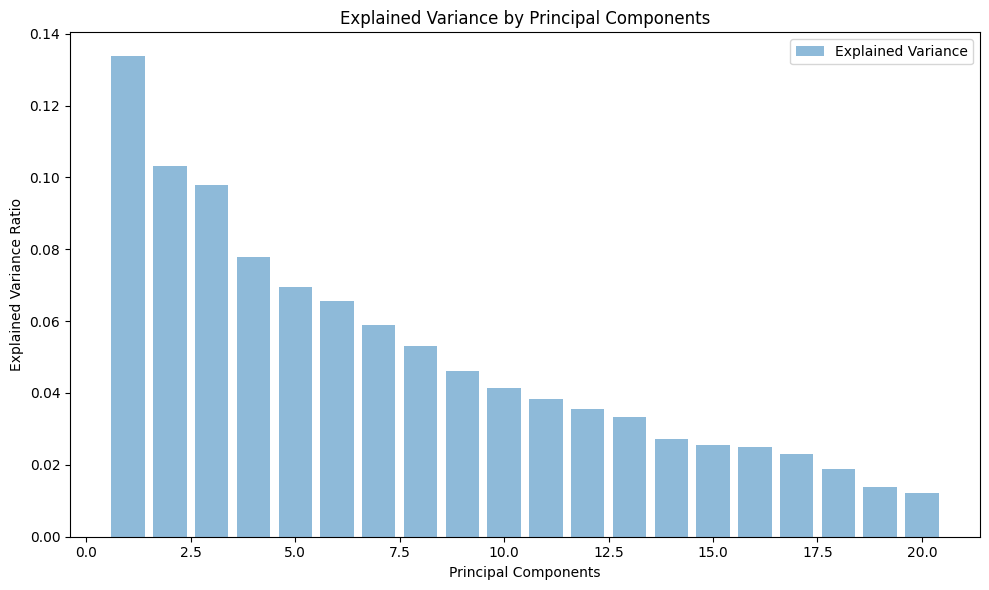

In [7]:
from sklearn.decomposition import PCA
# Зменшення вимірності за допомогою PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)
explained_variance = pca.explained_variance_ratio_


# Графік explained variance для кожної компоненти
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Розподіл даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Навчання моделі Random Forest 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [109]:
from sklearn.metrics import classification_report
# Прогнозування та оцінка моделі
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.94      0.93      0.93       907
           1       0.96      0.96      0.96       919
           2       0.97      0.93      0.95       879
           3       0.95      0.95      0.95       873
           4       0.98      0.99      0.99       927
           5       0.97      0.99      0.98       902
           6       0.99      0.98      0.99       917
           7       0.95      0.97      0.96       878
           8       0.95      0.97      0.96       909
           9       0.96      0.95      0.96       889

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



In [110]:
import joblib

joblib.dump(model, r'C:\Users\Admin\Downloads\МН\model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [124]:
path = r'C:\Users\Admin\Downloads\МН\segment_4.wav'
y, sr = librosa.load(path)

# Обчислення MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs_mean1 = np.mean(mfccs, axis=1)
# Змінити форму вектора на двовимірний масив
mm=mfccs_mean1.reshape(1,-1)


In [116]:
print(mm)

[[-6.8172601e+02  9.0603989e+01  1.3804976e+01  4.4874901e+01
   2.9857777e+01  1.2624135e+01  1.1495136e+01  8.0974007e+00
  -4.3636417e+00  1.8437514e+00 -5.0216694e+00  1.0280628e-01
  -7.1234012e-01  7.4367374e-01  4.5346904e+00  8.5949427e-01
  -1.0595982e+00  7.0446649e+00 -2.3147542e+00  1.3901192e-01]]


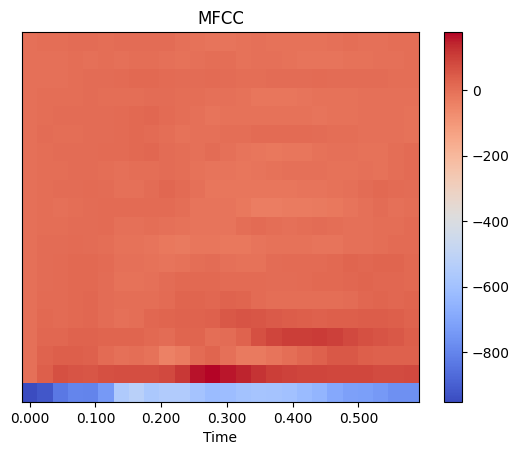

In [112]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.show()

In [125]:
ffsc=scaler.transform(mm)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [114]:
print(ffsc)

[[-1.5821714   0.06663451 -0.14763704  0.8956388   0.99931914  0.7241337
   1.1121727   1.0975332  -0.1296668  -0.17264153 -0.32194054 -0.23371853
  -0.05252875 -0.19610353  0.8301378  -0.5585169   0.43581298  0.8690852
  -0.00561427 -0.5524079 ]]


In [126]:

predicted_class = model.predict(ffsc)
print("Predicted class:", predicted_class)

Predicted class: [8]
